We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

## Import Libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
### Step 2:Load the file

## Load and review data

In [3]:
car_df = pd.read_csv("auto-mpg.csv")  


In [4]:
car_df.shape

(398, 9)

In [5]:
#dropping/ignoring car_name 
car_df = car_df.drop('car name', axis=1) # axis=1 means column


In [6]:
car_df=car_df.drop('model year',axis=1)

In [7]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,1
1,15.0,8,350.0,165,3693,11.5,1
2,18.0,8,318.0,150,3436,11.0,1
3,16.0,8,304.0,150,3433,12.0,1
4,17.0,8,302.0,140,3449,10.5,1


In [8]:
# Also replacing the categorical var with actual values
car_df['origin'] = car_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,america
1,15.0,8,350.0,165,3693,11.5,america
2,18.0,8,318.0,150,3436,11.0,america
3,16.0,8,304.0,150,3433,12.0,america
4,17.0,8,302.0,140,3449,10.5,america


In [9]:
car_df = pd.get_dummies(car_df, columns=['origin'])
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,1,0,0
1,15.0,8,350.0,165,3693,11.5,1,0,0
2,18.0,8,318.0,150,3436,11.0,1,0,0
3,16.0,8,304.0,150,3433,12.0,1,0,0
4,17.0,8,302.0,140,3449,10.5,1,0,0


## Dealing with Missing Values

In [10]:
#A quick summary of the data columns
car_df.describe()

,mpg,cylinders,displacement,weight,acceleration,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,1.000000,1.000000,1.000000


In [11]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
car_df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [12]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(car_df.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
car_df[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false


,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,1,0,0
126,21.0,6,200.0,?,2875,17.0,1,0,0
330,40.9,4,85.0,?,1835,17.3,0,0,1
336,23.6,4,140.0,?,2905,14.3,1,0,0
354,34.5,4,100.0,?,2320,15.8,0,0,1
374,23.0,4,151.0,?,3035,20.5,1,0,0


In [13]:
# Missing values have a'?''
# Replace missing values with NaN
car_df = car_df.replace('?', np.nan)
car_df[hpIsDigit['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,1,0,0


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


In [14]:
#instead of dropping the rows, lets replace the missing values with median value. 
car_df.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [15]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
car_df = car_df.apply(medianFiller,axis=0)

car_df['horsepower'] = car_df['horsepower'].astype('float64')  # converting the hp column from object / string type to float


## BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

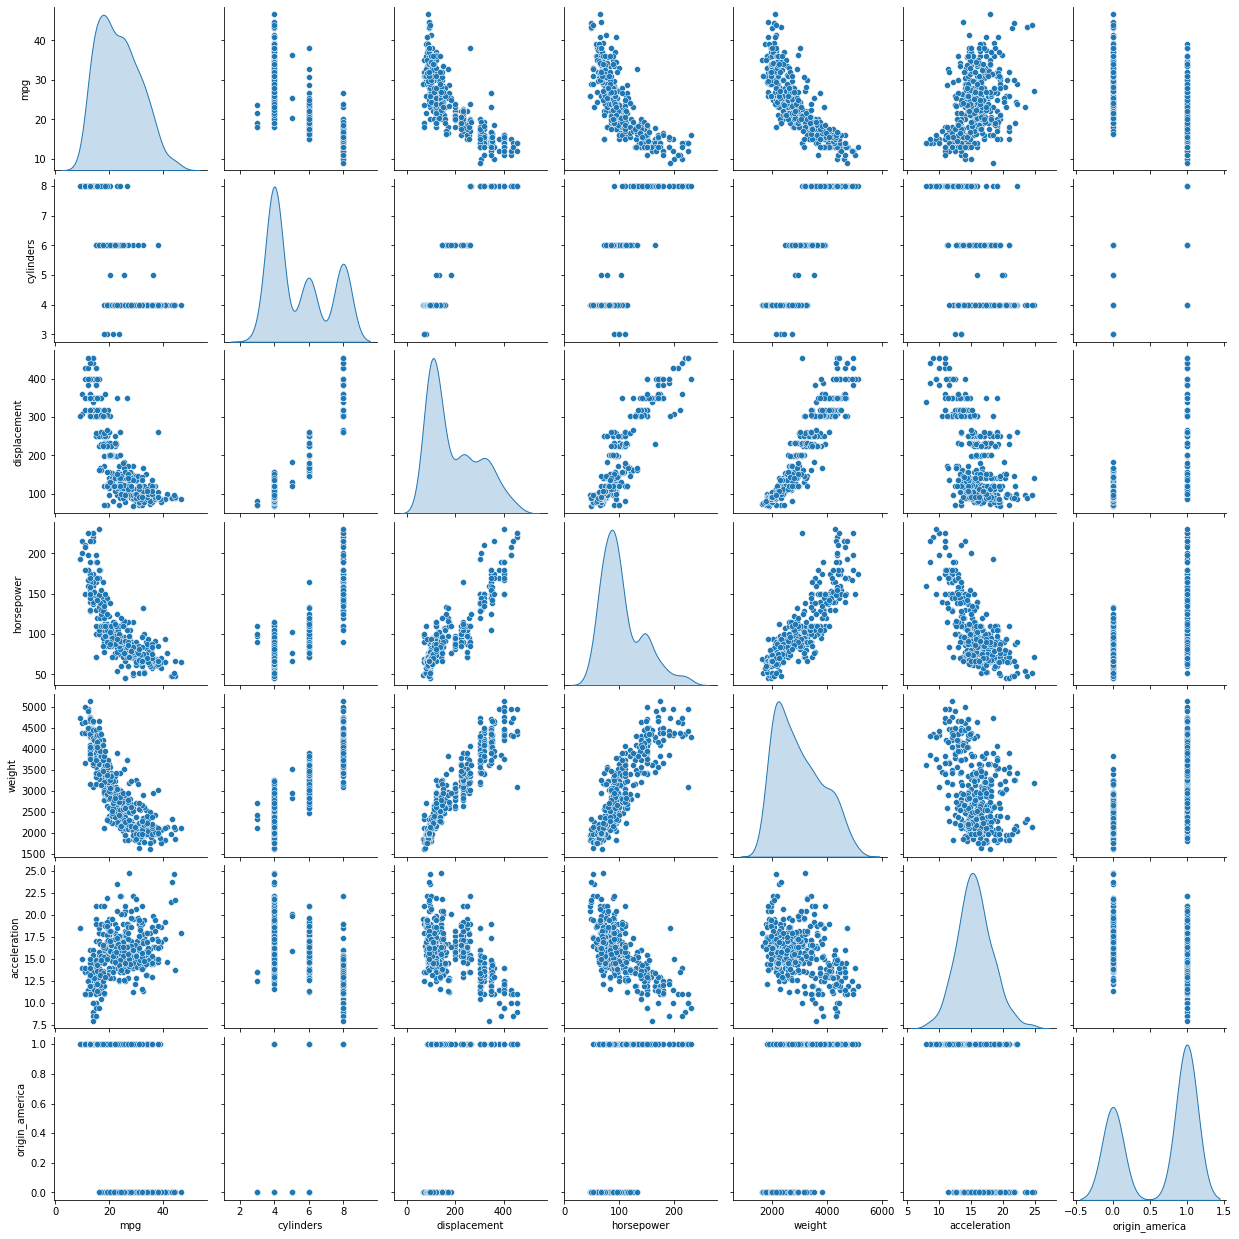

In [16]:
car_df_attr = car_df.iloc[:, 0:7]
sns.pairplot(car_df_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity


## Split Data

In [17]:
# lets build our linear model
# independant variables
X = car_df.drop(['mpg'], axis=1)
# the dependent variable
y = car_df[['mpg']]

In [18]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Fit Linear Model

In [19]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

Here are the coefficients for each variable and the intercept

In [20]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for cylinders is -0.5385175619522496
The coefficient for displacement is 0.009552745274875814
The coefficient for horsepower is -0.057276990793058855
The coefficient for weight is -0.005060766643316695
The coefficient for acceleration is -0.0498426033146083
The coefficient for origin_america is -1.072583444850445
The coefficient for origin_asia is 1.1567451175283274
The coefficient for origin_europe is -0.08416167267788233


In [21]:
intercept = reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 46.76618365089038


The score (R^2) for in-sample and out of sample

In [22]:
reg_model.score(X_train, y_train)

0.6946279278265036

In [23]:
#out of sample score (R^2)

reg_model.score(X_test, y_test)


0.7725116212499805

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.7639885997215912


In [25]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.7558663473910487


In [26]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 8)
(278, 37)


Polynomial Features (with only interaction terms) have improved the Out of sample R^2. However at the cost of increaing the number of variables significantly. 


In [29]:
car_df["horsepower"]=car_df["horsepower"].replace(to_replace="?",value=np.nan)
car_df["horsepower"]=car_df["horsepower"].astype(float)

In [31]:
median1=car_df["horsepower"].median()
median1

93.5